In [10]:
import pandas as pd
import numpy as np
from sklearn.tree import export_text, DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("stress_detection.csv", index_col=0)
print(df)

                day  PSS_score  Openness  Conscientiousness  Extraversion  \
participant_id                                                              
1                 1         34  2.322732           4.332193      1.185878   
1                 2         37  1.761436           3.254120      3.907281   
1                 3         30  3.025887           1.855002      2.045900   
1                 4         16  1.948370           4.966676      3.345225   
1                 5         32  3.343484           2.065936      3.137843   
...             ...        ...       ...                ...           ...   
100              26         30  2.529821           2.339608      1.321208   
100              27         33  1.319100           4.500507      4.816983   
100              28         30  1.899102           3.930147      4.047799   
100              29         28  1.472408           1.712893      1.245082   
100              30         10  3.152789           3.633976      2.387994   

In [16]:
df["high_stress"] = df["PSS_score"]
df.high_stress[df.high_stress < 27] = 0
df.high_stress[df.high_stress > 26] = 1

X = df[["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism", "sleep_duration", "screen_on_time", "mobility_distance"]]
y = df["high_stress"]

X_train = X.head(2400)
y_train = y.head(2400)
X_test = X.tail(800)
y_test = y.tail(800)

C:\Users\Sara Skovgaard Bay\AppData\Local\Temp\ipykernel_87028\3869323290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.high_stress[df.high_stress < 27] = 0
C:\Users\Sara Skovgaard Bay\AppData\Local\Temp\ipykernel_87028\3869323290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.high_stress[df.high_stress > 26] = 1


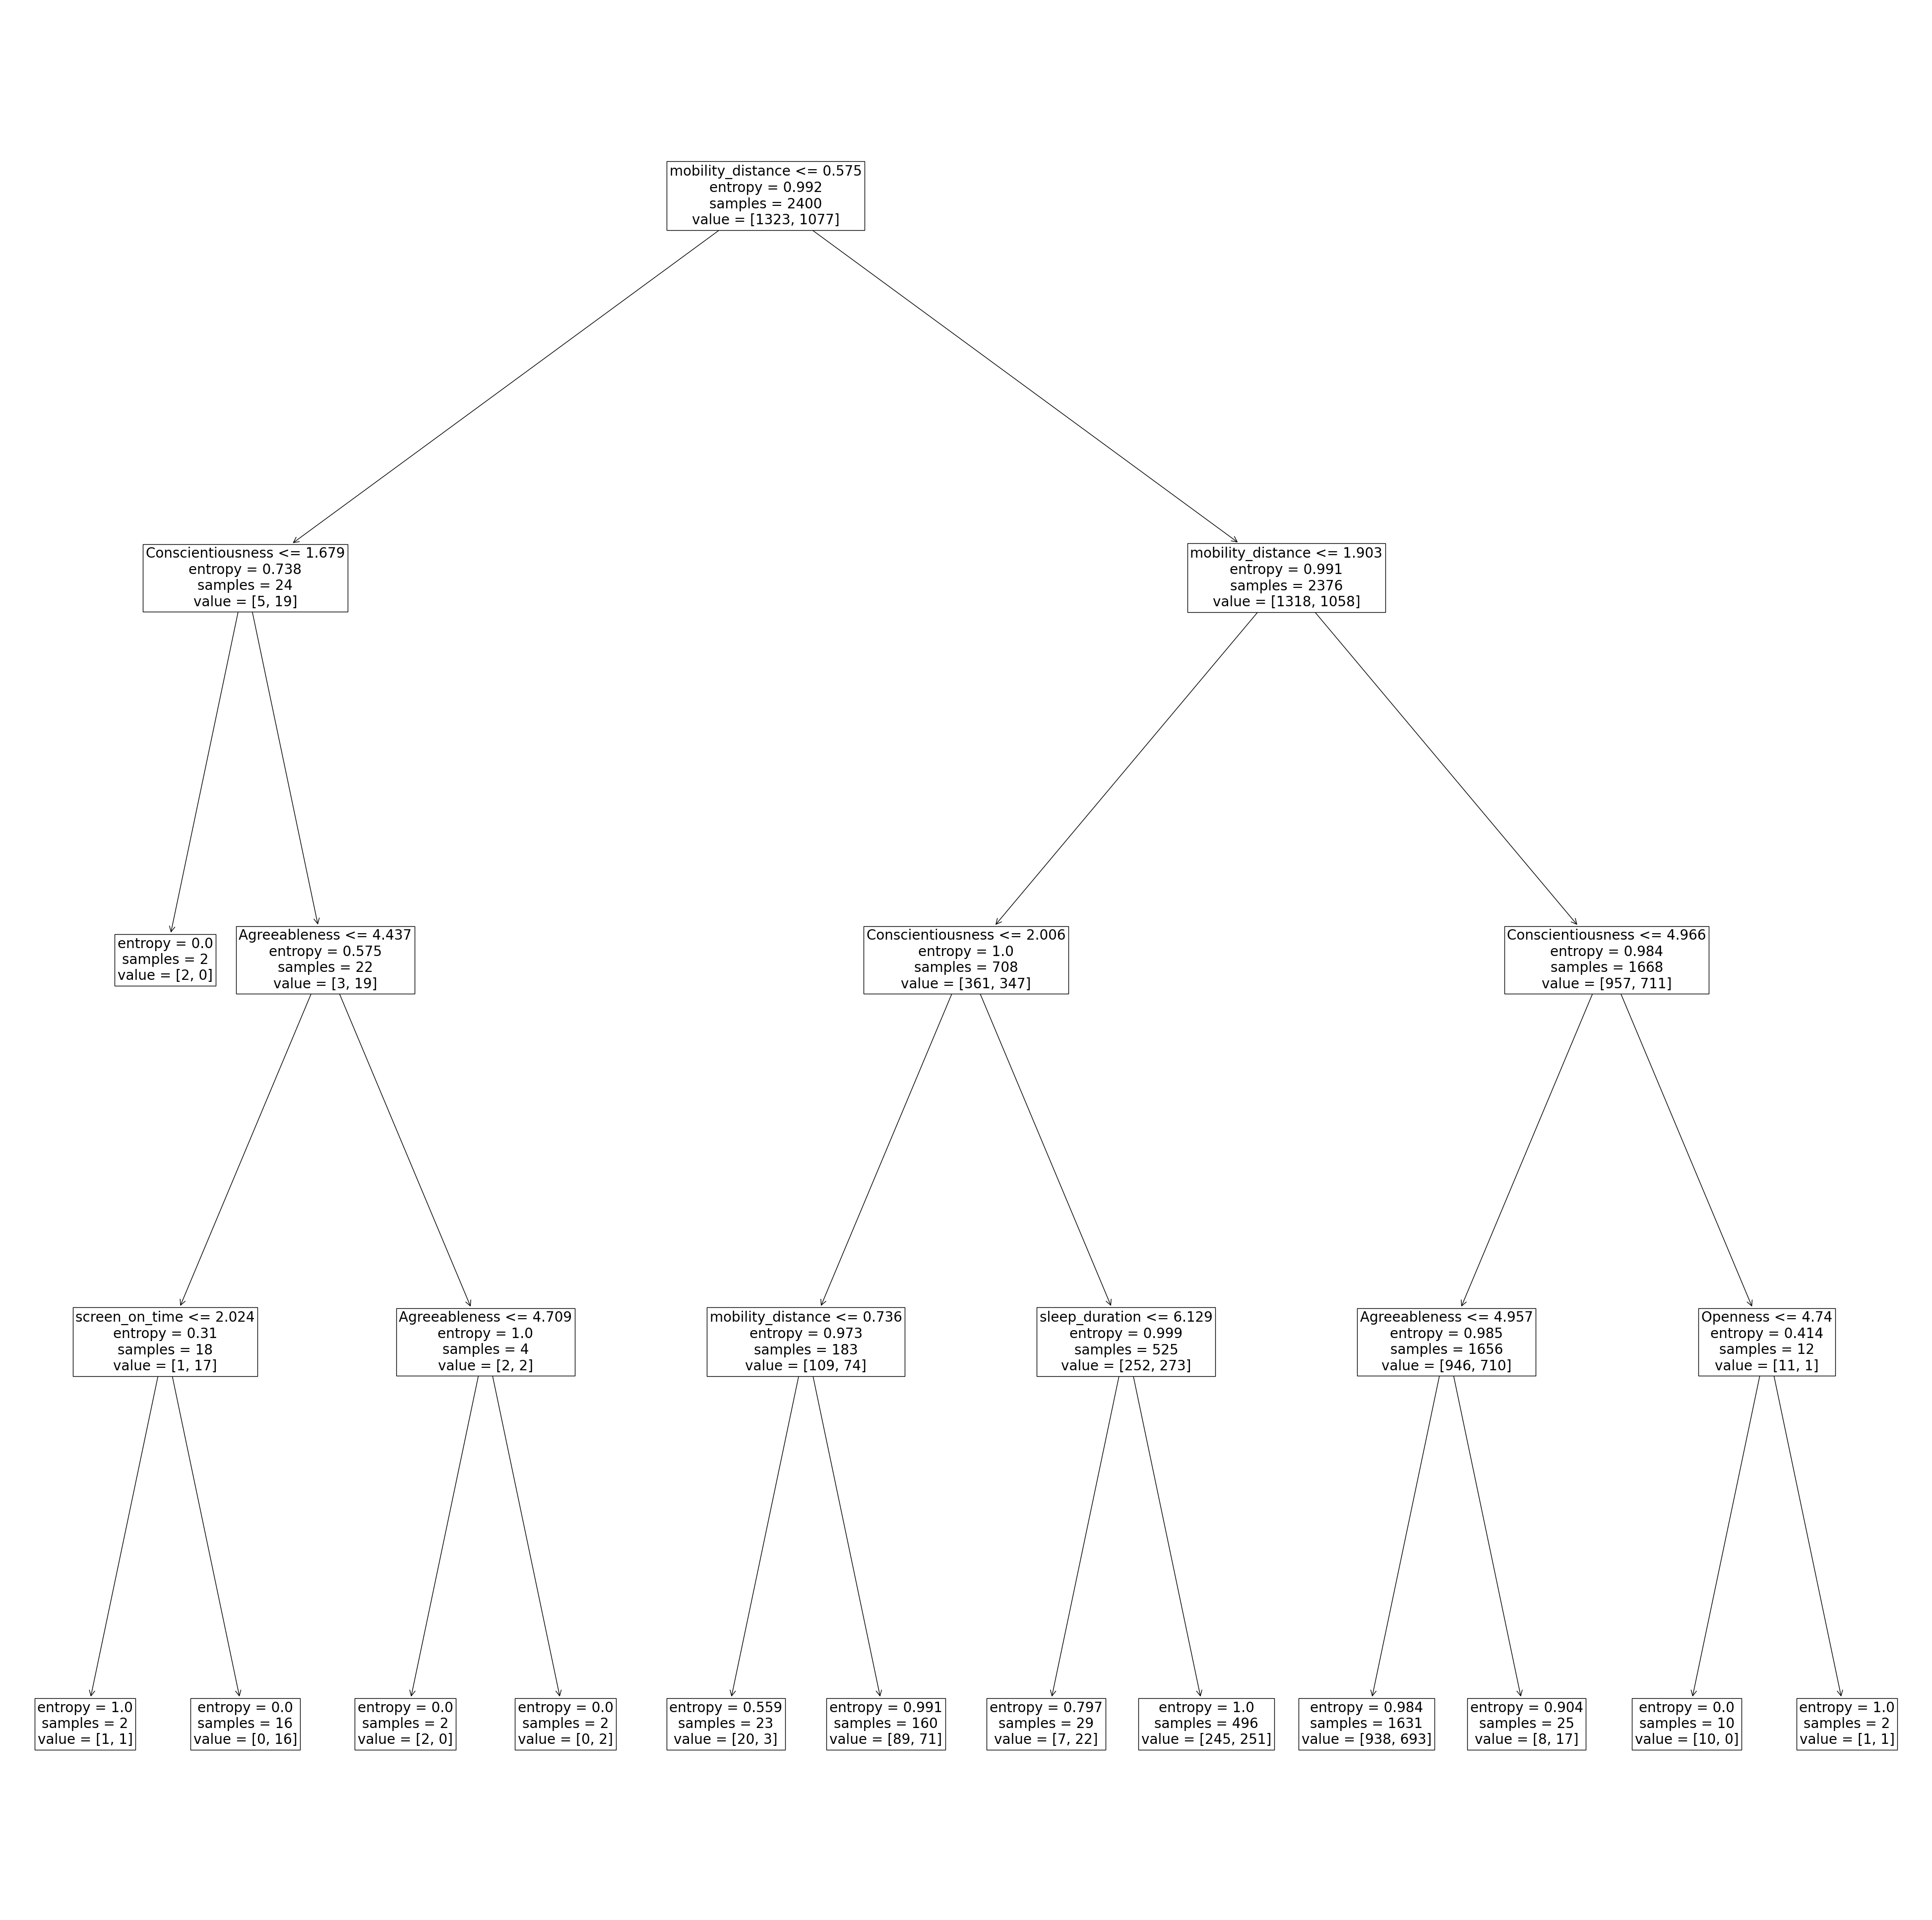

In [21]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf.fit(X_train, y_train)


fig = plt.figure(figsize=(50, 50))
_ = tree.plot_tree(clf, fontsize=20, feature_names=X.columns)

In [22]:
clf.score(X_test, y_test)

0.555

In [ ]:
len(y_test[y_test == 0])/len(y_test)

# classification does not do better than just guessing 1 every time

0.56125